<a href="https://colab.research.google.com/github/nedokormysh/GB_DA_algorithms/blob/lesson7/DA_algorithms_hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

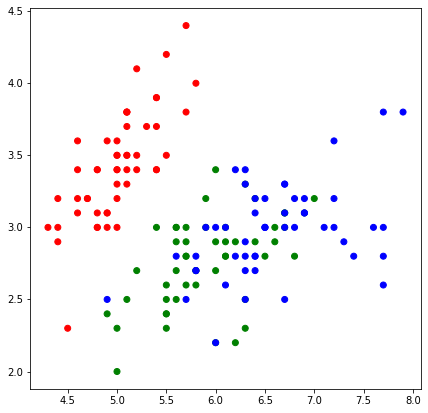

In [ ]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [ ]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [ ]:
def knn(x_train, y_train, x_test, k, weights=False, q = 0.5):
    
    answers = []
    for x in x_test:
        test_distances = [] # обнуляем список вычесленных расстояний.


        #print(len(answers))    
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
                        
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
          if weights == True:
            weight = q ** d[0]
            classes[d[1]] += weight
          else:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [ ]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [ ]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)
y_pred_w = knn(X_train, y_train, X_test, k, weights=True)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность взвешенного алгоритма при k = {k}: {accuracy(y_pred_w, y_test):.3f}')

Точность алгоритма при k = 3: 0.733
Точность взвешенного алгоритма при k = 3: 0.733


In [ ]:
def get_graph(X_train, y_train, k, weights=False):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .2

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    if weights == True:
      Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weights=True)
    else:
      Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

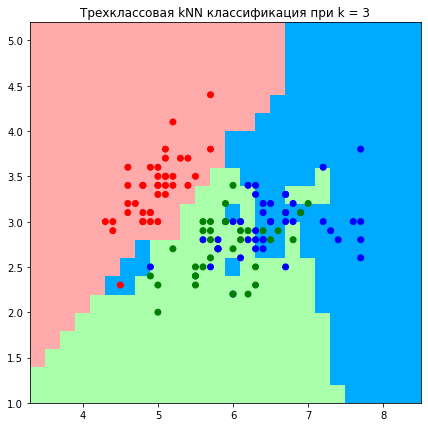

In [ ]:
get_graph(X_train, y_train, k)

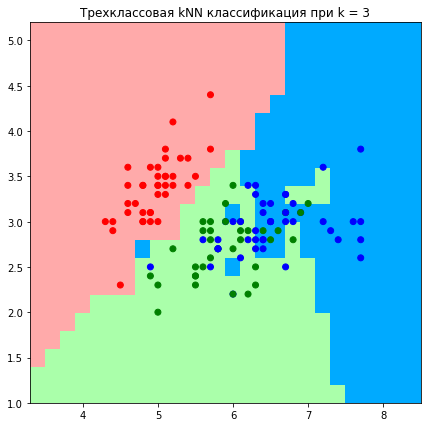

In [ ]:
get_graph(X_train, y_train, k, weights=True)

Text(0.5, 1.0, 'Зависимость точность от гиперпараметра: количество соседей\n')

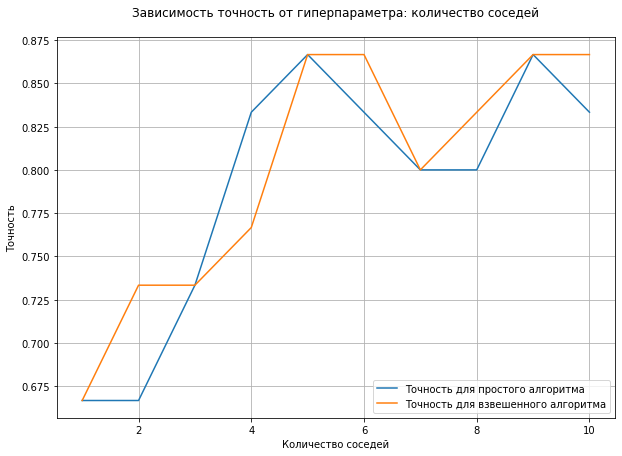

In [ ]:
k_list = np.arange(1, 11)
acc = []
acc_weighted = []

for k in k_list:
  y_pred = knn(X_train, y_train, X_test, k)  
  y_pred_w = knn(X_train, y_train, X_test, k, weights=True)

  # print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
  # print(f'Точность взвешенного алгоритма при k = {k}: {accuracy(y_pred_w, y_test):.3f}')

  acc.append(accuracy(y_pred, y_test))
  acc_weighted.append(accuracy(y_pred_w, y_test))

plt.figure(figsize = (10, 7))
plt.plot(k_list, acc, label='Точность для простого алгоритма')
plt.plot(k_list, acc_weighted, label='Точность для взвешенного алгоритма')
plt.ylabel('Точность')
plt.xlabel('Количество соседей')
plt.legend(loc='best')
plt.grid(True)
plt.title('Зависимость точность от гиперпараметра: количество соседей\n')

На мой взгляд в данном случае: для данного реализованного взвешивания и метрики точности нельзя наблюдать значительных различий между алгоритмами взвешенного knn и обычного. 

Попробуем второй вариант взвешивания

In [ ]:
def knn_2(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        w = 1
        for d in sorted(test_distances)[0:k]:
            w = 1 / (d[0] + 1) ** 2
            classes[d[1]] += w
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [ ]:
k = 8

y_pred = knn(X_train, y_train, X_test, k)
y_pred_w_2 = knn_2(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность взвешенного алгоритма при k = {k}: {accuracy(y_pred_w_2, y_test):.3f}')

Точность алгоритма при k = 8: 0.800
Точность взвешенного алгоритма при k = 8: 0.833


# Задание 2.

Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

In [ ]:
def quality_claster_analysis(centroids, clusters):

  distance = 0

  for i, centr in enumerate(centroids):
    # print(f'centr = {centr}')
    # print(f'cluster {i} centr = {clusters[i]}')
    distance += np.sum(np.sum((clusters[i] - centr) ** 2, axis=1)) / (2 * len(clusters[i]))
        
  return distance

In [ ]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [ ]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=800, centers = 3, random_state=1)
X[:,1] *= 1

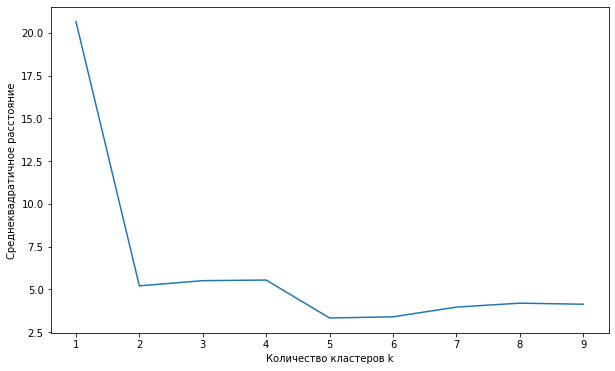

In [ ]:
max_iterations = 50
min_distance = 1e-4

k_list = []
dist_list = []

for k in range(1, 10):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    dist = quality_claster_analysis(centroids, clusters)
    k_list.append(k)
    dist_list.append(dist)

plt.figure(figsize=(10, 6))
plt.plot(k_list, dist_list)
plt.xticks(k_list)
plt.xlabel('Количество кластеров k')
plt.ylabel('Среднеквадратичное расстояние');